# 가설 : 사드 배치의 영향으로 중국인 관광객이 줄었을까?

## 정의
* 사드배치가 관강객 유치의 영향을 미치는 시점은 공식발표일인 2016년 7월.
* 중국 외교부가 사드배치로 인한 보복을 하겠다고 발표한 것은 2017년 3월. 
* 따라서 사드배치가 영향을 주는 것은 2017년 전후로 정의한다. 

## 데이터 분석 과정
 * 1) 월별 외래객 입국 엑셀 데이터 획득
 * 2) 데이터 중 중국인 관광객 데이터 정리 및 전처리 -> 연단위 중국인 관광객 수의 합으로 Bar chart 생성
 * 3) 월 단위 중국인 입국자 성장률 데이터 정리 및 전처리 -> 월 단위 로 line plot 생성

In [1]:
# 데이터 시각화 전 설정
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 목표 1) : 주어진 데이터에서 원하는 데이터만 골라 하나의 엑셀 파일로 만들 것

* 1) 원하는 정보
   - 파일명(년월 정보)
   - 중국인 관광객이 저장된 셀 : B21
   - 중국 입국자의 성장률이 저장된 셀 : I21
   
* 2) 구한 데이터를 하나의 엑셀 파일로 저장 : rexults.xlsx


In [2]:
# 엑셀 파일 하나라도 열려있으면 오류나니까 조심..........
# oepnpyxl 은 pip install 로 커맨드 창이나 주피터 노트북(! pip)에서 설치가능 - > 아나콘다 environments 에서 확인 가능

import os
path = "./data"
file_list = os.listdir(path)
from openpyxl import load_workbook

results = []

for file_name_raw in file_list:
    file_name = "./data/" + file_name_raw
    wb = load_workbook(filename=file_name, data_only=True)
    ws = wb.active
    result = []
    result.append(file_name_raw)
    result.append(ws['B21'].value)
    result.append(ws['I21'].value)
    
    results.append(result)

from openpyxl import Workbook
wb = Workbook()
ws = wb.active

for i in results:
    ws.append(i)

# 엑셀 2번째 행 아래로 밀기(빈 셀 삽입)
ws.insert_rows(2) 

# 맨 위 데이터 아래로 한 칸 씩 밀기 => 인덱스 자리 만들기 위함
ws.move_range("A1", rows=1,translate=True)
ws.move_range("B1", rows=1,translate=True)
ws.move_range("C1", rows=1,translate=True)

wb.save("results.xlsx")

In [3]:
china_tour_path = f'./results.xlsx'
raw_chtour = pd.read_excel(china_tour_path)
raw_chtour.columns = ['파일명', '관광객수', '중국인 입국자 성장률']
raw_chtour.head()

,파일명,관광객수,중국인 입국자 성장률
0,kto_201001.xlsx,40425,-1.9
1,kto_201002.xlsx,60590,9.8
2,kto_201003.xlsx,50330,26.4
3,kto_201004.xlsx,84252,36.9
4,kto_201005.xlsx,89056,78.3


In [4]:
# 파일명 년도별로 그릅화
year_chtour =[]
for item in raw_chtour['파일명'] :
    for year in range(2010, 2020) :
        if str(year) in item : 
            year_chtour.append(year)
raw_chtour['연도별'] = year_chtour
chtour_df = raw_chtour.groupby('연도별').sum()
chtour_df

,관광객수,중국인 입국자 성장률
연도별,,
2010,1011800,494.9
2011,1312511,225.3
2012,2033665,338.0
2013,3139867,590.1
2014,4772800,562.1
2015,4712133,53.7
2016,6948372,589.6
2017,3116505,-536.6
2018,3701973,301.4


## 연도별 중국인 관광객 수 BAR CHART

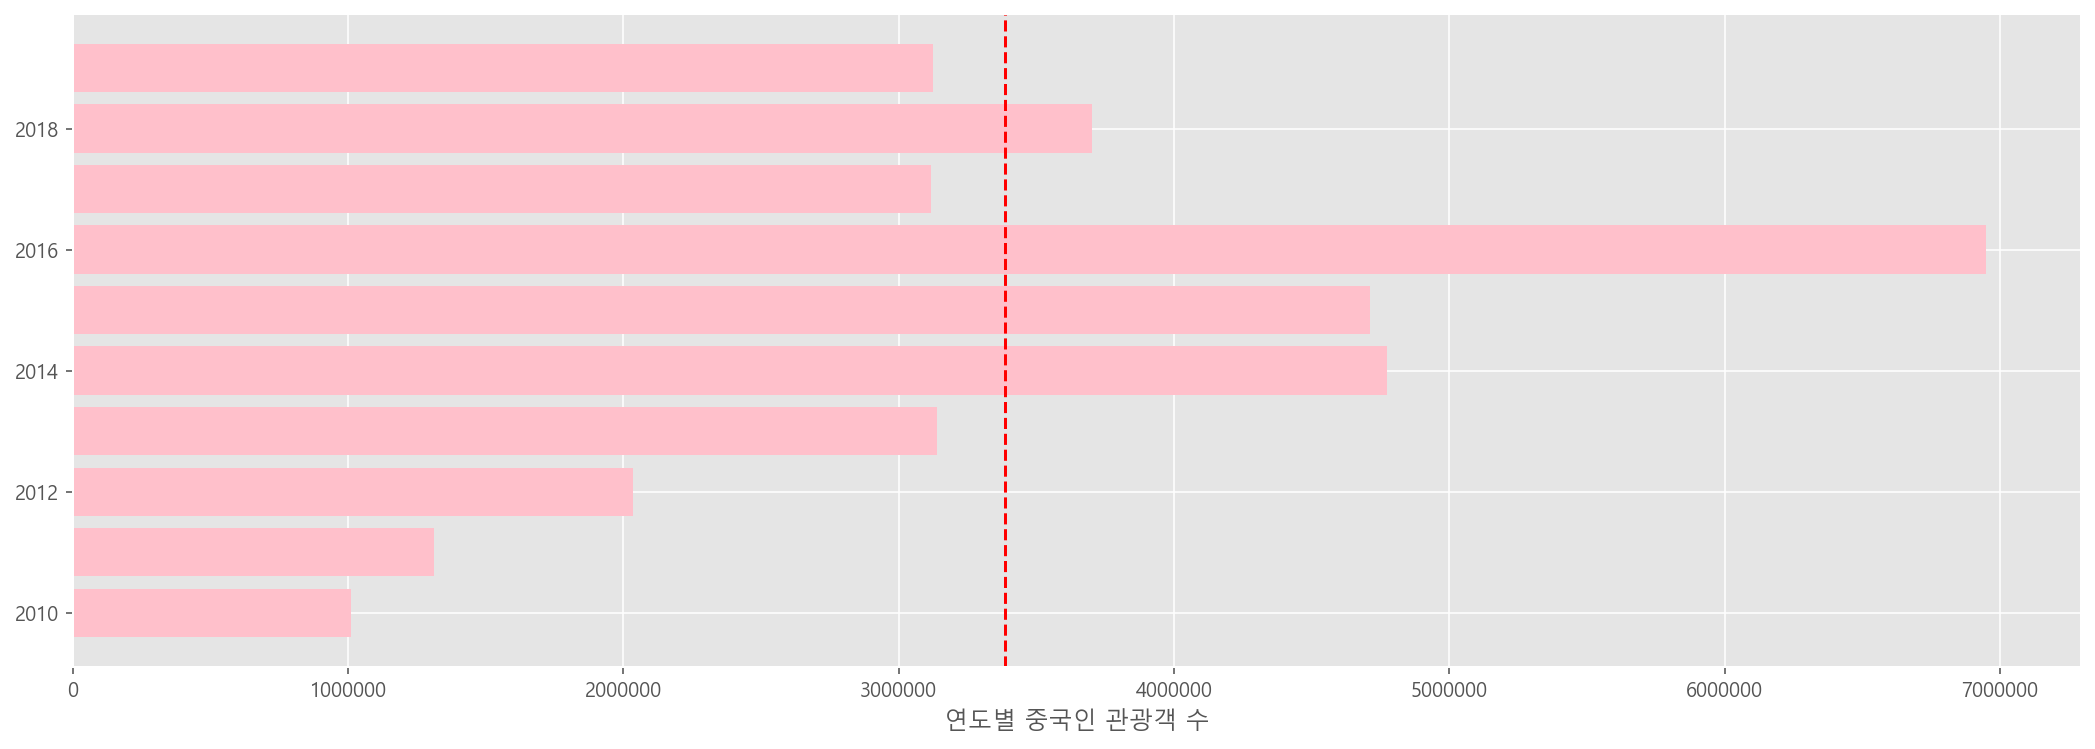

In [5]:
import numpy as np
import calendar

chyear = chtour_df.index
tourpep = chtour_df['관광객수']

fig, ax = plt.subplots(figsize=(18, 6))
ax.barh( chyear,tourpep,color='pink')
ax.set_xlabel('연도별 중국인 관광객 수')

tour_mean = np.mean(tourpep)
ax.axvline(tour_mean, ls='--', color='r')

plt.show()

## 2010-2019 월별 중국 입국자 성장률 LINE PLOT

In [6]:
# 데이터를 월별로 다시 정렬
time_index = []
for item in raw_chtour['파일명'] :
    time_index.append(item[4:8]+'.'+item[8:10])
raw_chtour.index = time_index

mon_chtour = raw_chtour.drop(['파일명', '연도별'], axis=1)
mon_chtour.head()

,관광객수,중국인 입국자 성장률
2010.01,40425,-1.9
2010.02,60590,9.8
2010.03,50330,26.4
2010.04,84252,36.9
2010.05,89056,78.3


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


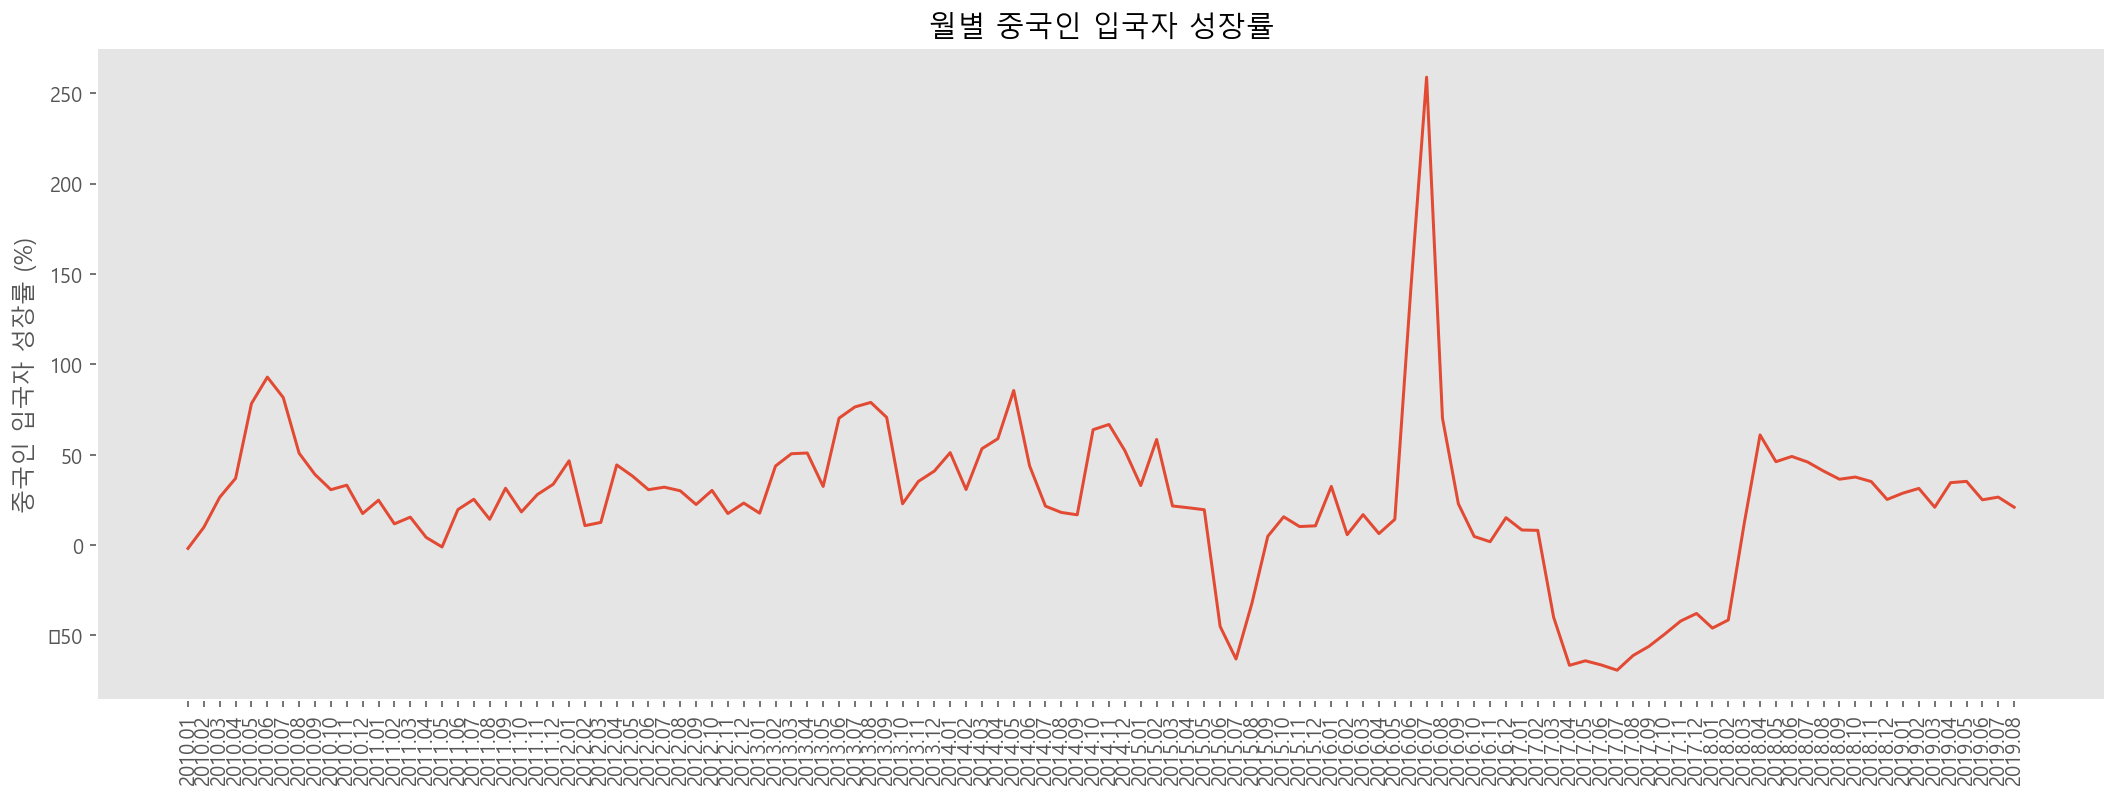

In [7]:
ts = mon_chtour['중국인 입국자 성장률']

t = mon_chtour.index
s = mon_chtour['중국인 입국자 성장률']

fig, ax = plt.subplots(figsize=(18, 6))
plt.xticks( rotation=90)
ax.plot(t, s)


ax.set(ylabel='중국인 입국자 성장률 (%)', title='월별 중국인 입국자 성장률')
ax.grid()

plt.show()

## 2010-2019 월별 중국 관광객 수 BAR CHART

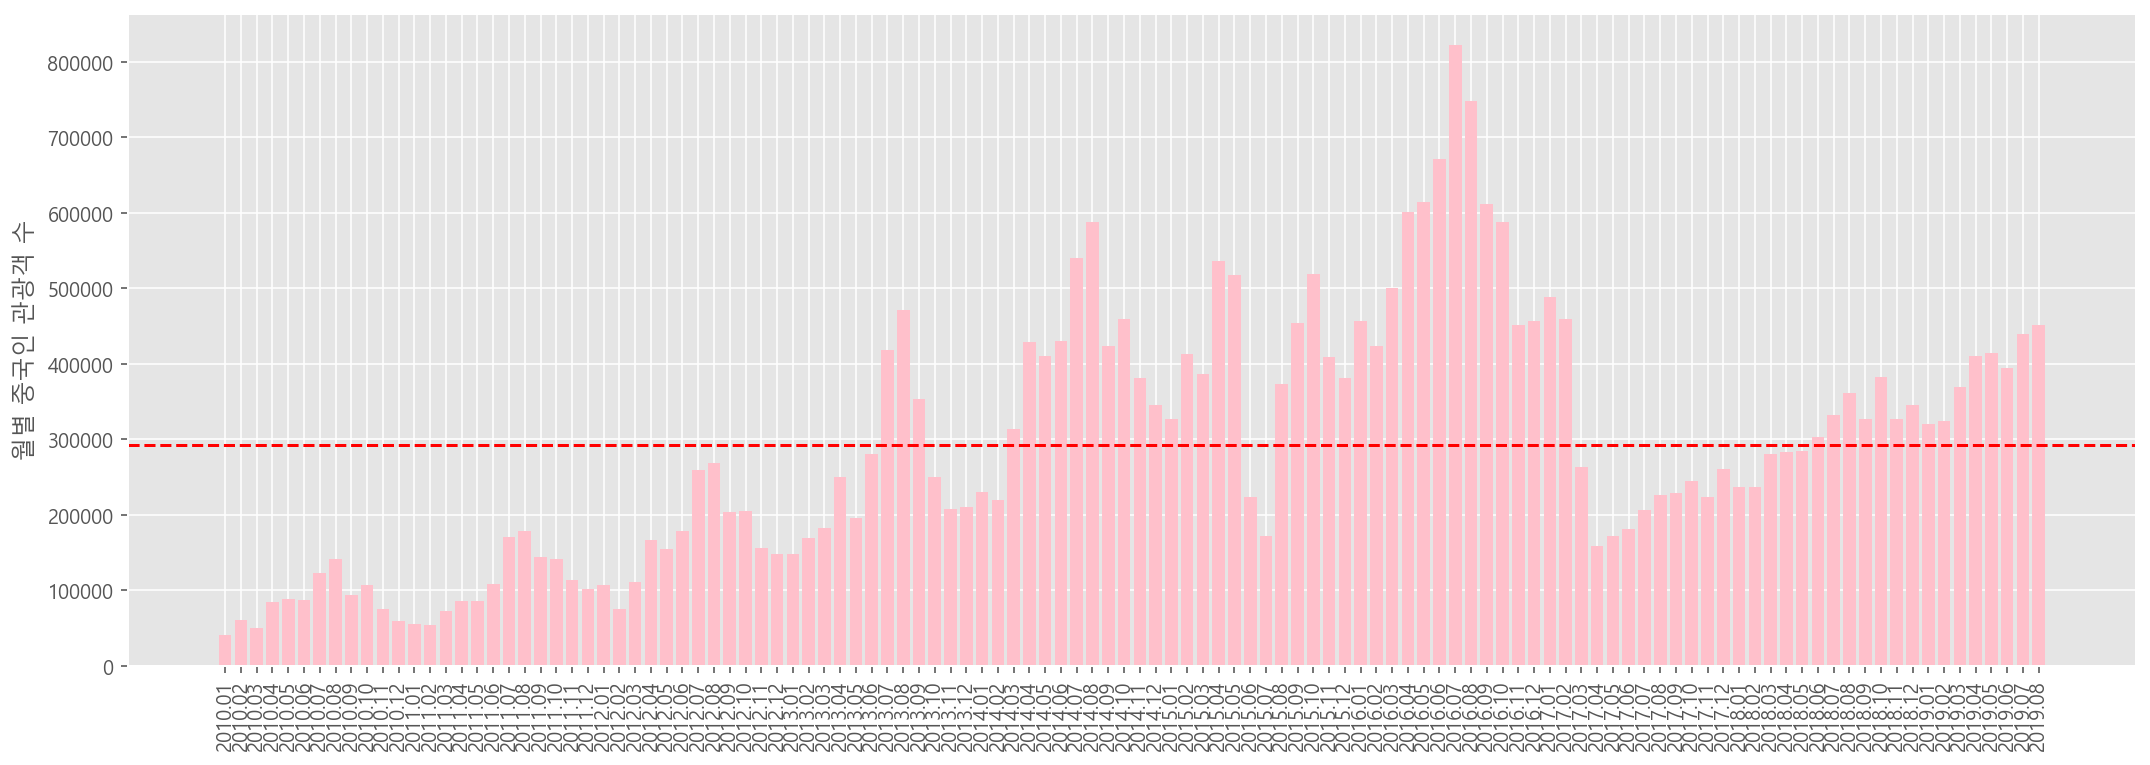

In [8]:
chmonth = mon_chtour.index
montourpep = mon_chtour['관광객수']

fig, ax = plt.subplots(figsize=(18, 6))
plt.xticks( rotation=90)
ax.bar( chmonth,montourpep,color='pink')
ax.set_ylabel('월별 중국인 관광객 수')

montour_mean = np.mean(montourpep)
ax.axhline(montour_mean, ls='--', color='r')

plt.show()

## 결과

#### 2010~2019 연도별 중국인 관광객수의 합 BAR CHART

* 2014년도 부터 꾸준히 증가하고 높아지던 관광객 수가 2017년도에 줄어들었지만 평균 언저리로

    2016년도에 눈에 띄게 높은 것으로 간주할 수 도 있다. 따라서 사드 배치로 인해 줄어들었다고 확신하기엔 이르다. 

#### 2010~2019 월 별 중국인 입국자수의 성장률 LINE PLOT

*  전체적으로 보아 2017년도 3월 이후 성장률이 급격히 감소 함을 보이므로

    입국자가 관광 뿐만 아닌 다른 목적이 있을 수 있다고 감안 하더라도 감소한 정도가 크므로 사드배치의 영향을 받았다고 생각 할 수 있다.

#### 2010~2019 월 별 중국인 관광객수의 합 BAR CHART

*  외교부가 사드배치로 인해 한국에게 보복을 가하겠다고 한 2017년 3월 이후 정확히 관광객 수가 평균이하로 감소하였다.

    따라서 사드배치로 인해 중국인 관광객 수가 줄어듬이 맞다고 생각 할 수 있다.
    
    2019년의 데이터가 8월 까지임을 가늠하면 그 수를 서서히 회복중임을 알 수 있다. 

###  가설 검증 완료 : 중국인 관광객은 사드배치로 인해 줄어든 것이 맞다.